# Recitation 04

These exercises cover numerical solution of ordinary differential equations using packages available in scipy.

## Topics Covered

1. Scipy package; `scipy.integrate` 
2. Solution of initial value problems for a single ODE using numerical ODE solvers with `solve_ivp`.
3. Solution of coupled systems of ODEs using numerical ODE solvers `solve_ivp`.
4. Solution of definite integrals using `quadrature`
5. Interpolation (1D) using `interp1d`
6. Combining numerical methods, e.g., `optimize` and `quadrature` or `solve_ivp`

### Code for Importing packages for today

```Python
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.integrate import solve_ivp, quadrature
from scipy.interpolate import interp1d
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.integrate import solve_ivp, quadrature
from scipy.interpolate import interp1d

## Problem 1

The following differential equation describes how the variable X changes as a function of time:

$$\frac{dx}{dt} = k\left(1 - x\right)^2$$

The initial value of x is zero.

For this system, k = 0.253 min$^{-1}$. Calculate the value of x after 3 minutes.

### Solution to Problem 01

This is a relatively straightfoward separable differential equation.  If we separate variables:

$$\frac{1}{(1-x)^2}dx = kdt$$

We can integrate from lower limits to upper limits:

$$\int_0^x\frac{1}{(1-x^\prime)^2}dx^\prime = \int_0^tkdt^\prime$$

We can solve this for x as a function of t:

$$x(t) = 1 - \frac{1}{1+kt}$$

We won't use it yet, but note we can also solve this to get t as a function of x:

$$t(x) = \frac{1}{k}\left(\frac{1}{1 - x} - 1\right)$$

### Code for Analytical solution
```Python
#Analytical Solution
k  = 0.253
dx = lambda x: k*(1-x)**2
x  = lambda t: (1 - 1/(1 + k*t))
print(dx(3), '' , x(3))
```

In [2]:
#Analytical Solution
k  = 0.253
dx = lambda x: k*(1-x)**2
x  = lambda t: (1 - 1/(1 + k*t))
dx(3)
x(3)
print(dx(3), '' , x(3))

1.012  0.4314951677089255


### Graphing the analytical solution

If we have an analytical solution for x(t), it's always nice to plot it so we can visualize how it behaves.

#### Code for graphing the analytical solution

```Python
tplot = np.linspace(0,3,100)
xplot = x(tplot)
plt.figure(1, figsize = (5, 5))
plt.plot(tplot, xplot, label = 'Analytical')
plt.xlabel('time', fontsize = 14)
plt.ylabel('X', fontsize = 14)
plt.xlim(0,3)
plt.ylim(0,1)
plt.legend(loc = 'upper left')
plt.show()
```

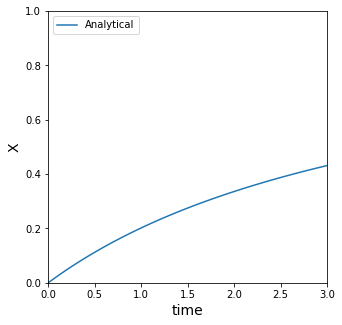

In [3]:
tplot = np.linspace(0,3,100)
xplot = x(tplot)
plt.figure(1, figsize = (5, 5))
plt.plot(tplot, xplot, label = 'Analytical')
plt.xlabel('time', fontsize = 14)
plt.ylabel('X', fontsize = 14)
plt.xlim(0,3)
plt.ylim(0,1)
plt.legend(loc = 'upper left')
plt.show()

### Numerical solution to Problem 01

The reason we picked an easy problem that we could solve by hand is so that we could compare numerical methods to it.  In class, we talked about an Euler step, which basically assumes that you have a constant derivative over a small step in time, $h$.

$$x_{i+1} = x_i + \frac{dx}{dt}h$$

We showed how this approximation of a constant derivative is actually pretty bad for any non-linear system, so with an Euler step, we find we have to make many, many very small steps to get a good approximation to a nonlinear function.

#### Homebrew Code for Euler Method

```python
#Using an Euler Method
nsteps = 5
tmax   = 3
h      = tmax/nsteps
tEU    = np.zeros(nsteps+1) #I'm creating the numpy array where I'll store all values of time.
xEU    = np.zeros(nsteps+1) #Likewise, I want to store all values of x for plotting.

#We'll add updated values to t and x on each pass through the loop
for i in range(0, nsteps):
    xEU[i+1] = xEU[i] + h*dx(xEU[i])
    tEU[i+1] = tEU[i] + h

print(f'At t = {tmax} with {nsteps} steps and a step size of {h:0.3f}:\n the Euler method predicts that x = {xEU[-1]:0.3f}, and the true value is {x(tmax):0.3f}')    
plt.figure(1, figsize = (5, 5))
plt.plot(tplot, xplot, label = 'Analytical Solution')
plt.scatter(tEU, xEU, color = 'red', marker = 's', label = 'Euler Step')
plt.xlabel('time', fontsize = 14)
plt.ylabel('X', fontsize = 14)
plt.xlim(0,3)
plt.ylim(0,1)
plt.legend(loc = 'upper left')
plt.show()
```

At t = 3 with 5 steps and a step size of 0.600:
 the Euler method predicts that x = 0.462, and the true value is 0.431


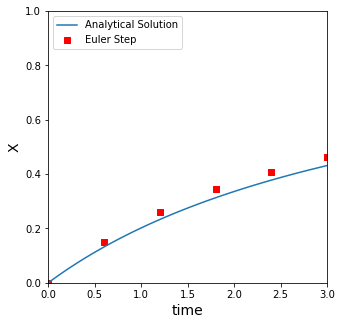

In [4]:
#Using an Euler Method
nsteps = 5
tmax   = 3
h      = tmax/nsteps
tEU    = np.zeros(nsteps+1) #I'm creating the numpy array where I'll store all values of time.
xEU    = np.zeros(nsteps+1) #Likewise, I want to store all values of x for plotting.

#We'll add updated values to t and x on each pass through the loop
for i in range(0, nsteps):
    xEU[i+1] = xEU[i] + h*dx(xEU[i])
    tEU[i+1] = tEU[i] + h

print(f'At t = {tmax} with {nsteps} steps and a step size of {h:0.3f}:\n the Euler method predicts that x = {xEU[-1]:0.3f}, and the true value is {x(tmax):0.3f}')    
plt.figure(1, figsize = (5, 5))
plt.plot(tplot, xplot, label = 'Analytical Solution')
plt.scatter(tEU, xEU, color = 'red', marker = 's', label = 'Euler Step')
plt.xlabel('time', fontsize = 14)
plt.ylabel('X', fontsize = 14)
plt.xlim(0,3)
plt.ylim(0,1)
plt.legend(loc = 'upper left')
plt.show()

### Higher Order Methods for solving ODEs

We also introduced higher order methods, like an explicit Runge-Kutta iteration, which improves dramatically on the accuracy of an Euler method.  It is more complex to write the code, but it is the same basic concept: we use the current value of the derivative of a function to estimate how that function will change with a change in the independent variable (t here).  This allows us to approximate where the function (x) will be at some point in the future (t).

The script below will do this with a basic for loop.

#### Code for Homebrew Runge Kutta Method

```python
nsteps = 5
tmax   = 3
h      = tmax/nsteps
xRK    = np.zeros(nsteps+1) #RK values
tRK    = np.zeros(nsteps+1)  #RK values
tEU    = np.zeros(nsteps+1) #Euler values
xEU    = np.zeros(nsteps+1) #Euler values

#Euler method
for i in range(0, nsteps):
    xEU[i+1] = xEU[i] + h*dx(xEU[i])
    tEU[i+1] = tEU[i] + h

#RK Method
for i in range(0, nsteps):
    dxdt  = dx(xRK[i]) #compute derivative, dx/dt @ x[i], t[i]
    k1    = dxdt       #RK parameter "k1[i]" is equal to derivative "dxdt[i] 
    k2    = dx(xRK[i] + h/2*k1) #RK parameter "k2[i]" is a function of x and dxdt
    k3    = dx(xRK[i] + h/2*k2) #RK parameter "k3[i]" is a function of x and dxdt
    k4    = dx(xRK[i] + h*k3)   #RK parameter "k4[i]" is a function of x and dxdt
    
    xRK[i+1] = xRK[i] + 1/6*h*(k1 + 2*k2 + 2*k3 + k4) #value of x after step is taken
    tRK[i+1] = tRK[i] + h #step time forward by h
    
print(f'At t = 4 with {nsteps} steps and a step size of {h:0.8f}:\n the RK method predits that x = {xRK[-1]:0.5f}, and the true value is {x(tmax):0.5f}')    
plt.figure(1, figsize = (5, 5))
plt.plot(tplot, xplot, label = 'Analytical Solution')
plt.scatter(tEU, xEU, color = 'red', marker = 's', label = 'Euler Step')
plt.scatter(tRK, xRK, label = 'Runge Kutta', marker = 'o', color = 'black')
plt.xlabel('time', fontsize = 14)
plt.ylabel('X', fontsize = 14)
plt.xlim(0,3)
plt.ylim(0,1)
plt.legend(loc = 'upper left')
plt.show()
```

At t = 4 with 5 steps and a step size of 0.60000000:
 the RK method predits that x = 0.43149, and the true value is 0.43150


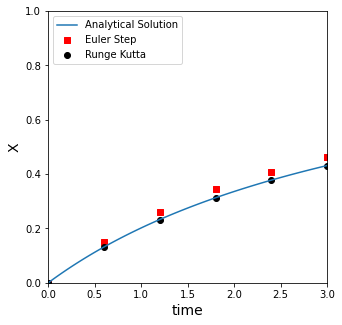

In [5]:
nsteps = 5
tmax   = 3
h      = tmax/nsteps
xRK    = np.zeros(nsteps+1) #RK values
tRK    = np.zeros(nsteps+1)  #RK values
tEU    = np.zeros(nsteps+1) #Euler values
xEU    = np.zeros(nsteps+1) #Euler values

#Euler method
for i in range(0, nsteps):
    xEU[i+1] = xEU[i] + h*dx(xEU[i])
    tEU[i+1] = tEU[i] + h

#RK Method
for i in range(0, nsteps):
    dxdt  = dx(xRK[i]) #compute derivative, dx/dt @ x[i], t[i]
    k1    = dxdt       #RK parameter "k1[i]" is equal to derivative "dxdt[i] 
    k2    = dx(xRK[i] + h/2*k1) #RK parameter "k2[i]" is a function of x and dxdt
    k3    = dx(xRK[i] + h/2*k2) #RK parameter "k3[i]" is a function of x and dxdt
    k4    = dx(xRK[i] + h*k3)   #RK parameter "k4[i]" is a function of x and dxdt

    xRK[i+1] = xRK[i] + 1/6*h*(k1 + 2*k2 + 2*k3 + k4) #value of x after step is taken
    tRK[i+1] = tRK[i] + h #step time forward by h

print(f'At t = 4 with {nsteps} steps and a step size of {h:0.8f}:\n the RK method predits that x = {xRK[-1]:0.5f}, and the true value is {x(tmax):0.5f}')    
plt.figure(1, figsize = (5, 5))
plt.plot(tplot, xplot, label = 'Analytical Solution')
plt.scatter(tEU, xEU, color = 'red', marker = 's', label = 'Euler Step')
plt.scatter(tRK, xRK, label = 'Runge Kutta', marker = 'o', color = 'black')
plt.xlabel('time', fontsize = 14)
plt.ylabel('X', fontsize = 14)
plt.xlim(0,3)
plt.ylim(0,1)
plt.legend(loc = 'upper left')
plt.show()

### ODE Solvers in Python

While writing numerical methods using loops is good from an educational standpoint, it is cumbersome and inefficient. There are options in Python's scipy package that do the above, but give us access to many additional options and solvers beyond Runge-Kutta that may be necessary for more difficult problems.  As an example, see below.  We can duplicate that whole RK loop using a few lines of code with `solve_ivp` from `scipy.integrate`.

The main thing to keep in mind when using `solve_ivp` is that, similar to `opt.root`, it will operate on a function that we define.  That function has a few particular formatting and syntax requirements.  By default, the function that we create needs to:

1. Be of the form $f(\mathrm{independent variable, dependent variable})$, e.g., $f(t, x)$
2. Have only one independent variable (e.g., t) and an array of dependent variables.
3. Return the derivative of each dependent variable at the current state of the system.

### Code for ODE solvers in Python

```python
#Using ODE solver from scipy.integrate.
def DX(t, x): #function has to be in form f(independent variable, dependent variable)
    return k*(1 - x)**2
tspan = (0.0, 3.0) #2 element array like structure (list, tuple, np.array, etc)
x0    = np.array([0.0])
ans   = solve_ivp(DX, tspan, x0)
print(ans)
```

In [6]:
def DX(t, x):
  der = k*(1-x)**2
  return der
tspan = (0.0, 3.0)
x0    = np.array([0.0])
ans = solve_ivp(DX, tspan, x0)
type(0.0)

float

Notice that this is actually pretty similar to the way we use `opt.root`.  The particulars about how we format the function are a little different, but there are many common features, one of which is that `solve_ivp` returns a solution structure with a lot of information in it.

The biggest things we'll want to check is whether the solution converged (.success or .message); the values of the independent variable (.t field); and the values of the dependent variable (.y field).

We should take a look at the dimensions of the sol.t and sol.y fields.  This can cause some quirks when we try to use them.

#### Reference Code

```python
print(ans)
print(ans.message)
print(ans.success)
print(ans.t)
print(ans.y)
print(ans.t.shape)
print(ans.y.shape)
print(ans.t.ndim)
print(ans.y.ndim)
```


In [7]:
print(ans.t.ndim)

1


#### Extracting information from the solution structure

If we want to know the value of our dependent variable (x) at a t = 3, well, we integrated this problem from 0 to 3, so the last value in our sol.y set is the one that we want.  We can extract it from that array and see that it agrees very closely with the analytical solution (notice issues with indexing due to 2D shape of sol.y).

#### Reference Code

```python
ans.y
ans.y[0]
ans.y[0][7]
ans.y[0,7]
ans.y[0,-1]
print(f'At t = 3, solve_IVP gives x = {ans.y[0,-1]:0.4f}, and the analytical solution is x = {x(3.0):0.4f}')
```


In [8]:
print(f'At t = 3, solve_IVP gives x = {ans.y[0,-1]:0.4f}, and the analytical solution is x = {x(3.0):0.4f}')

At t = 3, solve_IVP gives x = 0.4314, and the analytical solution is x = 0.4315


#### Graphing the solution from Python's ODE solver

Now that we have the problem solved, we can plot the data.  

Some things to notice--first, it is very accurate compared to an Euler method, with very little effort and using only default options.  Second, this solver does not take uniform steps, nor do we get control over the steps it takes by default.  In general, these algorithms use adaptive step sizes which makes them very efficient. We are usually going to want the solver to pick the time steps for us.

#### Reference Code

```python
tout = ans.t
xout = ans.y[0]
plt.figure(1, figsize = (5, 5))
plt.plot(tplot, xplot, label = 'Analytical Solution')
plt.scatter(tEU, xEU, color = 'red', marker = 's', label = 'Euler Step')
plt.scatter(tRK, xRK, label = 'Runge Kutta', marker = 'o', color = 'black')
plt.scatter(tout, xout, c = 'None', edgecolor = 'black', label = "Solve_IVP")
plt.xlabel('time', fontsize = 14)
plt.ylabel('X', fontsize = 14)
plt.xlim(0,3)
plt.ylim(0,1)
plt.legend(loc = 'upper left')
plt.show()
```

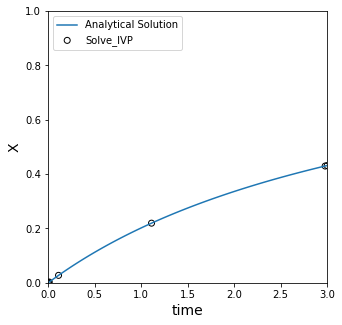

In [9]:
tout = ans.t
xout = ans.y[0]
plt.figure(1, figsize = (5, 5))
plt.plot(tplot, xplot, label = 'Analytical Solution')
# plt.scatter(tEU, xEU, color = 'red', marker = 's', label = 'Euler Step')
# plt.scatter(tRK, xRK, label = 'Runge Kutta', marker = 'o', color = 'black')
plt.scatter(tout, xout, c = 'None', edgecolor = 'black', label = "Solve_IVP")
plt.xlabel('time', fontsize = 14)
plt.ylabel('X', fontsize = 14)
plt.xlim(0,3)
plt.ylim(0,1)
plt.legend(loc = 'upper left')
plt.show()

## A more common question in reactor design:

Given:

$$\frac{dx}{dt} = k\left(1 - x\right)^2$$

The initial value of x is zero.

For this system, k = 0.253 min$^{-1}$. How long will it take for x to reach a value of 0.85?

#### Solution to the more common question in reactor design

Above, we solved analytically for x(t); let's plot it over a large time span to see about where this happens.

#### Reference Code

```python
tplot = np.linspace(0,30,100)
xplot = x(tplot)
plt.figure(1, figsize = (5, 5))
plt.plot(tplot, xplot, label = 'Analytical')
plt.hlines(0.85, tplot[0], tplot[-1], linestyle = 'dashed', color = 'black', linewidth = 0.75)
plt.vlines(22.397891963109352, 0, 1, linestyle = 'dashed', color = 'red', linewidth = 0.75)
plt.xlabel('time', fontsize = 14)
plt.ylabel('X', fontsize = 14)
plt.xlim(0,30)
plt.ylim(0,1)
plt.legend(loc = 'upper left')
plt.show()
```

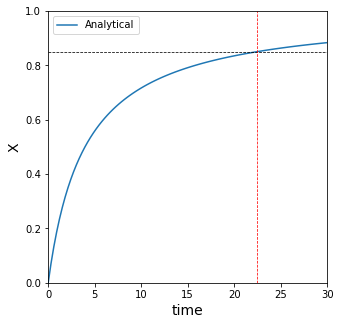

In [10]:
tplot = np.linspace(0,30,100)
xplot = x(tplot)
plt.figure(1, figsize = (5, 5))
plt.plot(tplot, xplot, label = 'Analytical')
plt.hlines(0.85, tplot[0], tplot[-1], linestyle = 'dashed', color = 'black', linewidth = 0.75)
plt.vlines(22.397891963109352, 0, 1, linestyle = 'dashed', color = 'red', linewidth = 0.75)
plt.xlabel('time', fontsize = 14)
plt.ylabel('X', fontsize = 14)
plt.xlim(0,30)
plt.ylim(0,1)
plt.legend(loc = 'upper left')
plt.show()

From the graph, we can see that somewhere around 25 minutes, the value of x is approximately 0.85.  We can do better than that though.  In many ways.

### Analytical Solution

First, for an easy problem like this, we recall that we solve for t as a function of x at the very start:

$$t(x) = \frac{1}{k}\left(\frac{1}{1 - x} - 1\right)$$

With that function in hand, we can plug in the value of x = 0.85 and find the time required analytically.

#### Code for analytical solution

```python
#Solve explicitly for time from analytical solution
t = lambda x: 1/k*(1/(1 - x) - 1)
print(t(0.85))
```

In [11]:
# Solve explicitly for time from analytical solution
t = lambda x: 1/k*(1/(1 - x) - 1)
print(t(0.85))

22.397891963109352


### Using scipy.optimize to find the requested information

In some cases though, we might have x(t) as a highly nonlinear function that is difficult to solve. We should recognize that we do have an analytical solution for x(t), specifically:

$$x(t) = 1 - \frac{1}{1+kt}$$

We can actually use that with lambda syntax to make a simple objective function and solve it with opt.newton.  This is an extremely useful technique. 

#### Code for scipy.optimize solution

```python
#We have a univariate x(t) function already...construct an objective with it
obj = lambda t: x(t) - 0.85
ans_newton, info = opt.newton(obj, 20, full_output = True)
ans_newton
print(f'{ans_newton:0.4f}, {t(0.85):0.4f}')
```

In [12]:
# We have a univariate x(t) function already...construct an objective with it
obj = lambda t: x(t) - 0.85
ans_newton, info = opt.newton(obj, 20, full_output = True)
ans_newton
print(f'{ans_newton:0.4f}, {t(0.85):0.4f}')

22.3979, 22.3979


### More general and complex examples

More commonly, though, we'll have legitimately hard problems that we can't solve by hand, so the above won't be options.  In these cases, we'll have to use numerical methods, and again, we have a few options.  For example, here, I can recognize that finding the time where x = 0.85 just involves solving this differential equation:

$$\frac{1}{(1-x)^2}dx = kdt$$

For limits of x = (0.0, 0.85) and limits on t of (0, t), where the upper limit is what we want to solve for.  I do that by solving the equation below, which just amounts to a definite integral.

$$\int_0^{0.85}\frac{1}{k(1-x)^2}dx = \int_0^tdt = t$$

Or, rearranging:

$$t = \int_0^{0.85}\frac{1}{k(1-x)^2}dx$$

This is a very common type of problem in reactor design, and it is a good application for Gaussian Quadrature:

#### Code for solving with Gaussian Quadrature

```python
#Recognize that we just need to solve a definite integral and use quadrature
integrand = lambda x: 1/k/(1 - x)**2
integral, err = quadrature(integrand, 0, 0.85)
print(f'{integral:0.4f}, {t(0.85):0.4f}')
```

In [13]:
integrand = lambda x: 1/k/(1 - x)**2
integral, err = quadrature(integrand, 0, 0.85)
integral

22.39789194382836

### Combining solve_ivp with opt.newton

Unfortunately, sometimes even that isn't possible.  We usually only get a definite integral like this when we have simple reactors and simple reactions...this method won't work very well when we have to analyze complex systems involving multiple species and multiple reactions.  In those cases, we'll almost always have to use an iterative solver like `solve_ivp`.  Those can be a little trickier to use in this type of problem where you are looking for the value of the independent variable (t here) that gets you a certain value of dependent variable (x here).

The problem is that with an iterative solver like this, we give it a span of independent variable values to iterate over, and we don't know if it will reach the desired value in that span.  Even if it does, it is hard to say where within the span it will hit that value, so it can be a little work to back the correct answer out when we have to use an iterative solver.  There are some sophisticated ways to handle this that we may cover later in the semester, but for now, we'll just look at the basics.

Below, we re-solve our ODE using `solve_ivp` (Runge Kutta type method), except we want to make sure that our x-value reaches 0.85.  So we pick a span of t values that we think is large enough to go past this value.  I'll say (0, 30).

Let's resolve the problem and see what we get.

#### Reference Code

```python
def DX(t, x): #function has to be in form f(independent variable, dependent variable)
    return k*(1 - x)**2

tspan = (0.0, 30.0)
x0    = [0.0]
ans2  = solve_ivp(DX, tspan, x0)
ans2
```

In [14]:
tspan = (0.0, 30.0)
x0    = [0.0]
ans2  = solve_ivp(DX, tspan, x0)
ans2

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 68
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.00000000e-04, 1.10000000e-03, 1.11000000e-02,
       1.11100000e-01, 1.11110000e+00, 2.97828855e+00, 5.84479777e+00,
       1.03546956e+01, 1.75337433e+01, 2.92130262e+01, 3.00000000e+01])
 t_events: None
        y: array([[0.00000000e+00, 2.52993599e-05, 2.78222571e-04, 2.80043554e-03,
        2.73398240e-02, 2.19418001e-01, 4.29606264e-01, 5.96345844e-01,
        7.23381599e-01, 8.15569975e-01, 8.80254824e-01, 8.83043281e-01]])
 y_events: None

We'll overlay the result with our analytical solution and see how we did; we'll zoom in on the targeted values of x to try to see where the solution is.

#### Reference Code

```python
tout2 = ans2.t
xout2 = ans2.y[0]
tplot = np.linspace(0,30,1000)
xplot = x(tplot)
plt.figure(1, figsize = (5, 5))
plt.plot(tplot, xplot, label = 'Analytical')
plt.scatter(tout2, xout2, c = 'None', edgecolor = 'black', label = "Solve_IVP")
plt.xlabel('time', fontsize = 14)
plt.ylabel('X', fontsize = 14)
#plt.xlim(15,30)
#plt.ylim(0.8,0.9)
plt.legend(loc = 'upper left')
plt.show()
```

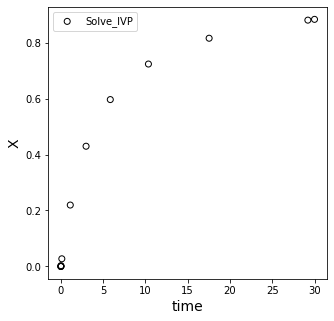

In [15]:
tout2 = ans2.t
xout2 = ans2.y[0]
tplot = np.linspace(0,30,1000)
xplot = x(tplot)
plt.figure(1, figsize = (5, 5))
#plt.plot(tplot, xplot, label = 'Analytical')
plt.scatter(tout2, xout2, c = 'None', edgecolor = 'black', label = "Solve_IVP")
plt.xlabel('time', fontsize = 14)
plt.ylabel('X', fontsize = 14)
#plt.xlim(15,30)
#plt.ylim(0.8,0.9)
plt.legend(loc = 'upper left')
plt.show()

### Finding the solution by interpolation

Here, that issue of not knowing exactly where to "step" with the independent variable comes into play.  We see that the solver basically jumped right over the desired value of x = 0.85.  We can estimate the value of t where x = 0.85 using interpolation.  This is in the scipy.interpolate package; here' we'll use 1D interpolation.

it has the syntax:

    interp1d("x values", "y values", kind = 'type of interpolation')

It returns an interpolating polynomial that you can then evaluate at any new x-value that is within the limits of the x_values you put into the constructor.

#### Reference Code

```python
int1 = interp1d(xout2, tout2, kind = 'linear')
int1(0.85)
print(f'{int1([0.85])[0]:0.4f}, {t(0.85):0.4f}')
```

In [16]:
int1 = interp1d(xout2, tout2, kind = 'linear')
int1(0.85)
print(f'{int1(0.85):0.4f}, {t(0.85):0.4f}')

23.7503, 22.3979


We see that it has some inaccuracy compared to our analytical solution!  This is because we are using a straight line to predict the value of a point in between two points on a curved line. 

#### Reference Code

```python
plt.figure(1, figsize = (5, 5))
plt.plot(tplot, xplot, label = 'Analytical')
plt.scatter(tout2, xout2, c = 'None', edgecolor = 'black', label = "Solve_IVP")
plt.xlabel('time', fontsize = 14)
plt.ylabel('X', fontsize = 14)
plt.xlim(15,30)
plt.ylim(0.8,0.9)
plt.legend(loc = 'upper left')
plt.show()
```

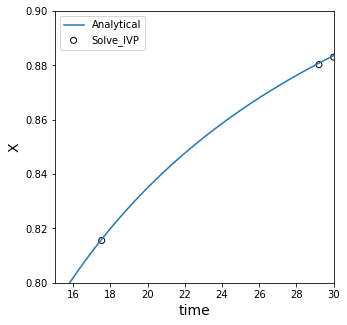

In [17]:
plt.figure(1, figsize = (5, 5))
plt.plot(tplot, xplot, label = 'Analytical')
plt.scatter(tout2, xout2, c = 'None', edgecolor = 'black', label = "Solve_IVP")
plt.xlabel('time', fontsize = 14)
plt.ylabel('X', fontsize = 14)
plt.xlim(15,30)
plt.ylim(0.8,0.9)
plt.legend(loc = 'upper left')
plt.show()

### Cubic spline interpolation

For nonlinear functions, like x(t), we can improve accuracy some by using a cubic spline:

#### Reference Code

```python
int1 = interp1d(xout2, tout2, kind = 'cubic')
print(f'{int1([0.85])[0]:0.4f}, {t(0.85):0.4f}')
```

In [18]:
int1 = interp1d(xout2, tout2, kind = 'cubic')
print(f'{int1(0.85):0.4f}, {t(0.85):0.4f}')

22.4355, 22.3979


This does a better job, but it is still a rough approximation to the true solution. The reason is that the two points we are looking at are actually a bit far away from x = 0.85.

#### Reference Code

```python
plt.figure(1, figsize = (5, 5))
plt.plot(tplot, xplot, label = 'Analytical')
plt.scatter(tout2, xout2, c = 'None', edgecolor = 'black', label = "Solve_IVP")
plt.xlabel('time', fontsize = 14)
plt.ylabel('X', fontsize = 14)
plt.xlim(15,30)
plt.ylim(0.8,0.9)
plt.legend(loc = 'upper left')
plt.show()
```

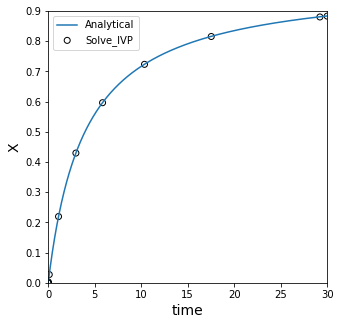

In [19]:
plt.figure(1, figsize = (5, 5))
plt.plot(tplot, xplot, label = 'Analytical')
plt.scatter(tout2, xout2, c = 'None', edgecolor = 'black', label = "Solve_IVP")
plt.xlabel('time', fontsize = 14)
plt.ylabel('X', fontsize = 14)
plt.xlim(0,30)
plt.ylim(0.0,0.9)
plt.legend(loc = 'upper left')
plt.show()

### Integration Tolerances

We can improve the precision of the integration, which increases the number of points available for interpolation and allows us to use points closer to the true value.

#### Reference Code

```python
tspan = (0.0, 30.0)
x0    = [0.0]
ans3  = solve_ivp(DX, tspan, x0, atol = 1e-10, rtol = 1e-10)
tout3 = ans3.t
xout3 = ans3.y[0]
tplot = np.linspace(0,30,1000)
xplot = x(tplot)
plt.figure(1, figsize = (5, 5))
plt.plot(tplot, xplot, label = 'Analytical')
plt.scatter(tout3, xout3, c = 'None', edgecolor = 'black', label = "Solve_IVP")
plt.xlabel('time', fontsize = 14)
plt.ylabel('X', fontsize = 14)
plt.xlim(15,30)
plt.ylim(0.8,0.9)
plt.legend(loc = 'upper left')
plt.show()
int1 = interp1d(xout3, tout3, kind = 'cubic')
print(f'{int1([0.85])[0]:0.4f}, {t(0.85):0.4f}')
```

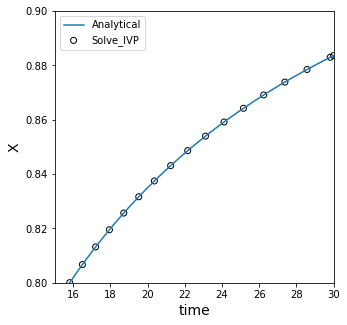

22.3979, 22.3979


In [20]:
tspan = (0.0, 30.0)
x0    = [0.0]
ans3  = solve_ivp(DX, tspan, x0, atol = 1e-10, rtol = 1e-10)
tout3 = ans3.t
xout3 = ans3.y[0]
tplot = np.linspace(0,30,1000)
xplot = x(tplot)
plt.figure(1, figsize = (5, 5))
plt.plot(tplot, xplot, label = 'Analytical')
plt.scatter(tout3, xout3, c = 'None', edgecolor = 'black', label = "Solve_IVP")
plt.xlabel('time', fontsize = 14)
plt.ylabel('X', fontsize = 14)
plt.xlim(15,30)
plt.ylim(0.8,0.9)
plt.legend(loc = 'upper left')
plt.show()
int1 = interp1d(xout3, tout3, kind = 'cubic')
print(f'{int1(0.85):0.4f}, {t(0.85):0.4f}')

### Combining IVP with scipy.optimize

My preferred solution is actually below.  It is very common that we want to evaluate differential equation solutions at points other than those chosen by the solver, and Python provides us a nice way to do that.

Specifically, it will output an interpolating polynomial directly as part of our solution structure.  We do this by turning on the dense_output option. We'll look at how to use this interpolating polynomial, it's really useful!!

#### Reference Code

```python
ans4 = solve_ivp(DX, (0, 30), [0], dense_output = True, rtol = 1e-10, atol = 1e-10)
ans3
ans4.sol(3)
```

In [21]:
ans4 = solve_ivp(DX, tspan, x0, dense_output = True, rtol = 1e-10, atol = 1e-10)
ans4.sol(22.5)

array([0.85057901])

### Use the dense output to create an objective function

One of my favorite ways to use the dense output is to create an objective function that we can solve to find where x = 0.85

#### Code
```python
obj = lambda t: ans4.sol(t)[0] - 0.85
ans5, info = opt.newton(obj, 20, full_output = True)
print(f'{ans5:0.4f}, {t(0.85):0.4f}')
```

In [22]:
obj = lambda t: ans4.sol(t)[0] - 0.85
ans5, info = opt.newton(obj, 20, full_output = True)
print(f'{ans5:0.4f}, {t(0.85):0.4f}')

22.3979, 22.3979


## Problem 2

Solve the following system of ODEs; plot x and y on the domain from t = 0 to 5.

\begin{align}
\frac{dx}{dt} &= -x + y\\
\frac{dy}{dt} &=  x - y - 0.1y^2\\
x(0) &= 10\\
y(0) &= 20
\end{align}



### Solution to Problem 02

If you follow the approach above, and if you understood the difference between solving univariate equations with opt.newton compared to solving systems of equations with opt.root, this will be straightforward.

I just have to recognize that the function we build here to pass to solve_ivp has to always have the structure:

$$f(\text{independent variable, dependent variable})$$

In other words, `solve_ivp` will only really work directly on two arguments.  In this case, we have an independent variable (t) and two dependent variables (x,y).  As with `opt.root`, we have to stack those dependent variables inside of some type of list or array.

Otherwise, the approach is identical. Check the solution outputs so that you understand how your values of the independent and dependent variables are stored in sol.y.

#### Reference Code

```python
def P2(t, var):
    x = var[0]
    y = var[1]
    d1 = -x + y
    d2 =  x - y - 0.1*y**2
    return np.array([d1, d2])
tspan = (0, 5)
var0  = [10, 20]
P2sol = solve_ivp(P2, tspan, var0, rtol = 1e-6, atol = 1e-6)
P2sol
```

In [23]:
def P2(t, var):
    x = var[0]
    y = var[1]
    d1 = -x + y
    d2 =  x - y - 0.1*y**2
    return np.array([d1, d2])
  
tspan = (0, 5)
var0  = [10, 20]
P2sol = solve_ivp(P2, tspan, var0, rtol = 1e-6, atol = 1e-6)
P2sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 170
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.        , 0.01600333, 0.07348047, 0.13341476, 0.19961873,
       0.27203071, 0.35093929, 0.43663085, 0.52946741, 0.62989276,
       0.73846926, 0.85592268, 0.98318713, 1.12146609, 1.27232231,
       1.43782191, 1.62078718, 1.82529416, 2.05782748, 2.33079378,
       2.68162628, 3.03017147, 3.37871666, 3.72880688, 4.08540507,
       4.45221308, 4.83094991, 5.        ])
 t_events: None
        y: array([[10.        , 10.15256289, 10.59164198, 10.90355112, 11.11840061,
        11.23763618, 11.26705888, 11.21418751, 11.08768196, 10.8966901 ,
        10.65030235, 10.35709832, 10.02483566,  9.66025165,  9.26893873,
         8.85524   ,  8.42208297,  7.97058303,  7.49892862,  6.99850385,
         6.43079004,  5.93920905,  5.5085689 ,  5.12777362,  4.78497023,
         4.47254698,  4.18623952,  4.06885595],
  

### The Solution Structure for ODE systems

Note again the shape of the independent variable in the solution structure (.t field) is a 1D structure, while the shape of the dependent variable (.y field) is a 2D array.  We have to take this into account when trying to use the information e.g., when plotting.

#### Reference Code

```python
print(P2sol.t.shape)
print(P2sol.y.shape)
P2tout = P2sol.t
P2xout = P2sol.y[0,:]
P2yout = P2sol.y[1,:]
print(P2xout.shape, P2yout.shape)
print(P2xout)
print(P2yout)
```

In [24]:
print(P2sol.t.shape)
print(P2sol.y.shape)
P2tout = P2sol.t
P2xout = P2sol.y[0,:]
P2yout = P2sol.y[1,:]
print(P2xout.shape, P2yout.shape)
print(P2xout)
print(P2yout)

(28,)
(2, 28)
(28,) (28,)
[10.         10.15256289 10.59164198 10.90355112 11.11840061 11.23763618
 11.26705888 11.21418751 11.08768196 10.8966901  10.65030235 10.35709832
 10.02483566  9.66025165  9.26893873  8.85524     8.42208297  7.97058303
  7.49892862  6.99850385  6.43079004  5.93920905  5.5085689   5.12777362
  4.78497023  4.47254698  4.18623952  4.06885595]
[20.         19.23190276 16.92295808 15.08222354 13.51864663 12.20579981
 11.10781282 10.191839    9.42753049  8.78763558  8.24802396  7.7876295
  7.38834074  7.03478211  6.71402164  6.41521841  6.12919366  5.84784313
  5.56309687  5.26414736  4.92263603  4.62121196  4.35094133  4.10618608
  3.88068339  3.67055279  3.47387665  3.39205468]


### Visualizing the Solution to the ODE System

And we can plot for visualization.

#### Reference Code

```python
plt.figure(1, figsize = (5, 5))
plt.plot(P2tout, P2xout, label = 'x')
plt.plot(P2tout, P2yout, label = 'y')
plt.xlabel('t', fontsize = 14)
plt.ylabel('x, y', fontsize = 14)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.xlim(0, 5)
plt.ylim(0, 20)
plt.legend()
plt.show()
```
    

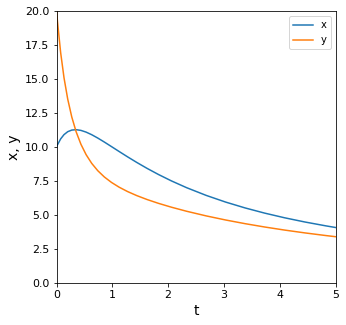

In [25]:
plt.figure(1, figsize = (5, 5))
plt.plot(P2tout, P2xout, label = 'x')
plt.plot(P2tout, P2yout, label = 'y')
plt.xlabel('t', fontsize = 14)
plt.ylabel('x, y', fontsize = 14)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.xlim(0, 5)
plt.ylim(0, 20)
plt.legend()
plt.show()